# <b style="color:aqua">Outliers</b>

## <b style="color:green">Outlier Detection Using the Percentile Method | Winsorization Technique</b>
- Max = 95 >--->>> 100 percentile
- Min = 10 >--->>> 10 0 percentile
- We can __remove__ or __capping(Winsorization)__ the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/weight-height.csv")
df.head(7)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889


In [3]:
df.shape

(10000, 3)

In [4]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [5]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

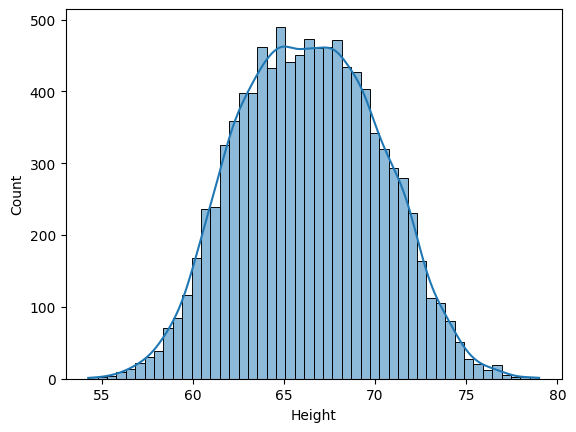

In [6]:
sns.histplot(data=df, x='Height', kde=True)
plt.show()

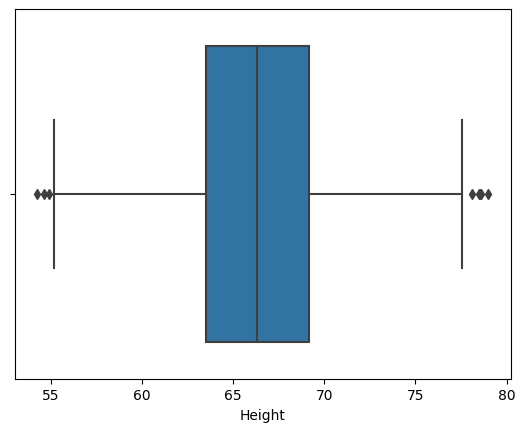

In [7]:
sns.boxplot(x = df['Height'])
plt.show()

In [8]:
upper_limit = np.round(df['Height'].quantile(0.99), 2)
upper_limit

74.79

In [9]:
lower_limit = np.round(df['Height'].quantile(0.01), 2)
lower_limit

58.13

In [12]:
ndf = df[(df['Height'] <= upper_limit) & (df['Height'] >= lower_limit)]
ndf

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [13]:
ndf.shape

(9800, 3)

In [14]:
ndf['Height'].describe()

count    9800.000000
mean       66.364366
std         3.645075
min        58.134496
25%        63.577162
50%        66.318070
75%        69.119896
max        74.785714
Name: Height, dtype: float64

In [15]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

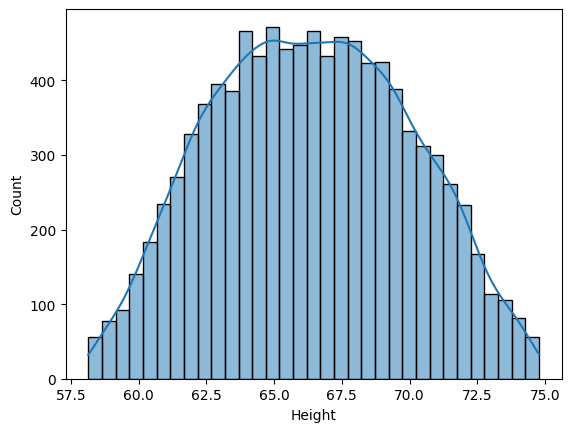

In [17]:
sns.histplot(ndf['Height'], kde=True)
plt.show()

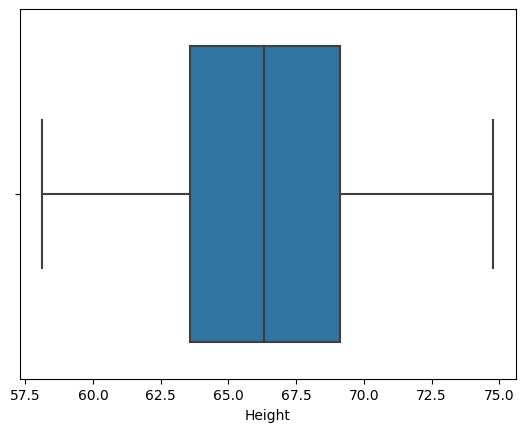

In [18]:
sns.boxplot(x = ndf['Height'])
plt.show()

### <b style="color:red">Capping</b>

In [20]:
# Capping --> Winsorization
# np.where(condition, True, False)
df['Height'] = np.where(df['Height'] >= upper_limit,
        upper_limit,
        np.where(df['Height'] <= lower_limit,
        lower_limit,
        df['Height']))
df.shape

(10000, 3)

In [21]:
df['Height'].describe()

count    10000.000000
mean        66.366279
std          3.795907
min         58.130000
25%         63.505620
50%         66.318070
75%         69.174262
max         74.790000
Name: Height, dtype: float64

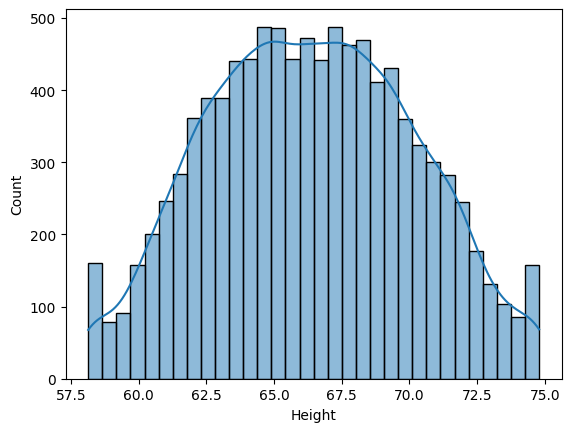

In [22]:
sns.histplot(df['Height'], kde=True)
plt.show()

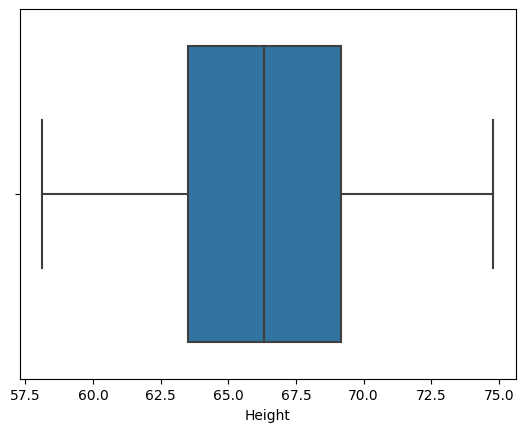

In [24]:
sns.boxplot(x = df['Height'])
plt.show()